In [2]:
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
chan = 'GHZ'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = ['A04']
day = 15
hr = 13

In [5]:
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')

In [6]:
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))

In [7]:
stream.normalize()

1 Trace(s) in Stream:
7F.A04..BHZ | 2020-01-15T00:00:00.000000Z - 2020-01-15T23:59:59.999000Z | 1000.0 Hz, 86400000 samples

In [8]:
stream_snapshot = stream.slice(starttime=start_time+hr*3600,endtime=start_time+(hr+1)*3600)

In [9]:
stream_z = stream_snapshot.select(component="Z")

In [10]:
tr = stream_z[0]

In [11]:
tr_filt = tr.copy()

In [12]:
tr_filt.filter('highpass', corners=4, freq=20, zerophase=True)

7F.A04..BHZ | 2020-01-15T13:00:00.000000Z - 2020-01-15T14:00:00.000000Z | 1000.0 Hz, 3600001 samples

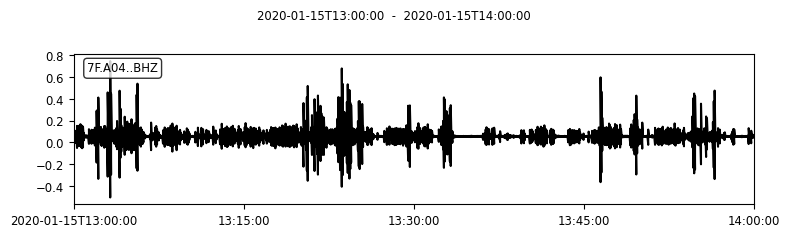

In [13]:
z = stream_z.plot()

In [14]:
df = tr_filt.stats.sampling_rate

In [15]:
aic_f = aic_simple(tr_filt.data)

In [16]:
p_idx = aic_f.argmin()

In [17]:
print(p_idx / df)
print(p_idx)

3410.472
3410472


In [19]:
print(start_time+hr*3600 + (p_idx / df))

2020-01-15T13:56:50.472000Z
